<a href="https://colab.research.google.com/github/pili-zhangqiu/ML-Summer-School/blob/master/AICore_SC_Lesson05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting Started**
**Mounting your GDrive**

By mounting the Drive to your Python notebook, you will be able to read and manipulate files stored in your Google *Drive*.

In [7]:
# Import the function to mount the Drive
from google.colab import drive

# This line shows that we will be mounting everything stored in the main GDrive folder
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Introduction to Multifeature Linear Regression**
**Opening the data file**

In [8]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

    instant      dteday  season  yr  ...  casual  registered   cnt  numpigeons
0         1  2011-01-01       1   0  ...     331         654   985        1547
1         2  2011-01-02       1   0  ...     131         670   801        1004
2         3  2011-01-03       1   0  ...     120        1229  1349         709
3         4  2011-01-04       1   0  ...     108        1454  1562        1016
4         5  2011-01-05       1   0  ...      82        1518  1600        1185
5         6  2011-01-06       1   0  ...      88        1518  1606         647
6         7  2011-01-07       1   0  ...     148        1362  1510         882
7         8  2011-01-08       1   0  ...      68         891   959        1217
8         9  2011-01-09       1   0  ...      54         768   822        1070
9        10  2011-01-10       1   0  ...      41        1280  1321         528
10       11  2011-01-11       1   0  ...      43        1220  1263         907
11       12  2011-01-12       1   0  ...      25    

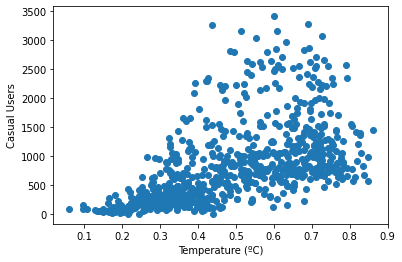

In [15]:
# Use pandas to read the csv
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/BikeSharingDaily.csv')

# Preview of the dataset
print(df.head(20))

# Create a dependent and independent variable to allocate different feature values
print(df.columns)

plt.scatter(df['temp'],df['casual'])
plt.xlabel('Temperature (ºC)')
plt.ylabel('Casual Users')
plt.show()

In [31]:
# plot all data and find features that might be interesting
'''
for i in range(16):
  for j in range(16):
    if i<j:
      plt.figure()
      plt.scatter(np.array(df[df.columns[i+1]]), np.array(df[df.columns[j+1]]))
      plt.xlabel(str(df.columns[i+1]))
      plt.ylabel(str(df.columns[j+1]))
'''

'\nfor i in range(16):\n  for j in range(16):\n    if i<j:\n      plt.figure()\n      plt.scatter(np.array(df[df.columns[i+1]]), np.array(df[df.columns[j+1]]))\n      plt.xlabel(str(df.columns[i+1]))\n      plt.ylabel(str(df.columns[j+1]))\n'

**Explanation on predictions and cost**

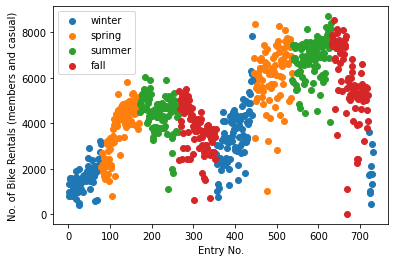

In [33]:
# Plot relevant features by grouping them
groups = df.groupby('season')

for name, group in groups:
  x = group['instant']
  y = group['cnt']
  plt.scatter(x,y, label={1:'winter', 2:'spring', 3:'summer', 4:'fall'}[name])
  
plt.legend()
plt.xlabel('Entry No.')
plt.ylabel('No. of Bike Rentals (members and casual)')
plt.show()

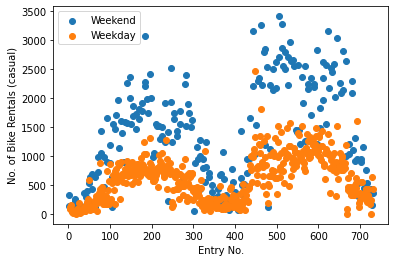

In [30]:
groups = df.groupby('workingday')

for name, group in groups:
  x = group['instant']
  y = group['casual']
  plt.scatter(x,y, label={0:'Weekend', 1:'Weekday'}[name])
  
plt.legend()
plt.xlabel('Entry No.')
plt.ylabel('No. of Bike Rentals (casual)')
plt.show()

# **Optimising Our Regression Model**
In this example we will be automatize the process in the section above, by allocating random combinations of values to 'm' and 'b'. Random Search will be used as our optimiser in order to increase our chances of finding the linear function that allows for the minimum cost.

In [34]:
# Calculate your mean squared error (MSE) or cost
# MSE =  1/n * sum_from_0_to_n( (y_i-y_pred_i)^2 )
def mse_cost(y, y_pred):
  diffs = y - y_pred
  squared_diffs = np.square(diffs)
  mean_squared_diffs = np.mean(squared_diffs)
  return mean_squared_diffs

In [55]:
# Single feature: y = m*x + b
# Multi-feature: y = m_1*x_1 + m_2*x_2 + m_3*x_3 ... + b
features = [df['hum'], df['windspeed'], df['atemp'], df['yr']]

# Define the dependent and independent variables
x = np.stack(features, axis=1)
y = np.array(df['cnt'])


In [49]:
# Create the random search function
def random_search(n_iterations):  # an optimiser
  lowest_cost = float("inf")      # Variable for lowest cost I've seen so far
  for i in range(n_iterations):   
    m = np.random.uniform(0, 10000, len(features))  # Create a random number from 0 to 10k, but create as any as I have in my features array = 5 and add them into an array
    b = np.random.uniform(0, 3000)                  # Only create one random number, because we only need a b, but we need 5 'm' because there 5 independent variables

    y_pred = np.zeros(len(y)) # Use np.zeros to create empty continers. In this case of the same size as y

    # Execute a for loop to retrieve each element of the m array created above
    # But we need to express y_pred as: y = m_1*x_1 + m_2*x_2 + m_3*x_3 ... + b
    for i in range(len(features)):
      y_pred += x[:,i]*m[i]     # x[:,i] retrieve the values for specific features (e.g. temp, hum...). We are using this because we stack them horizontally
                                # m[i] I am retrieving the individual random m values generated and multiplying it with x
                                # After this I should have: y = m_1*x_1 + m_2*x_2 + m_3*x_3 ...
    y_pred += b # Sum the b, acuse there was no b in the function above
                # x +=1 ----- this means ---->  x = x+1
    
    # Now, see if this function with this m and b combination is better than the previous loop
    cost = mse_cost(y,y_pred)   # calculate cost of prediction = how bad the function fits the data
    if cost<lowest_cost:
      best_m = m  # store the new best m array values
      best_b = b  
      lowest_cost = cost  # set the lowest cost to the current new lowest cost

  return best_m, best_b, lowest_cost   # return the values to help me define my prediction function

Cost of my prediction:  2069959.5053910466
Values of m:  [ 614.8147487  1392.61801625 6225.44986752 1534.36676394]  Value of b:  956.4238877867492


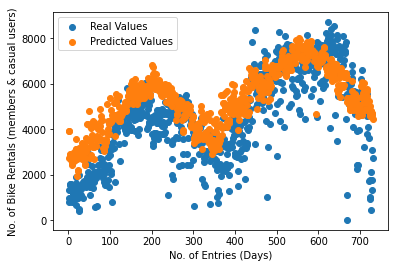

In [56]:
# Run the random search funcion
m, b, cost  = random_search(500)


# Get our prediction function: y = m_1*x_1 + m_2*x_2 + m_3*x_3 ... + b
y_pred = np.zeros(len(y))
for i in range(len(features)):
  y_pred += x[:,i]*m[i]
y_pred += b


# Plot scatter plot
print('Cost of my prediction: ', cost)
print('Values of m: ', m, ' Value of b: ',b)

plt.scatter(df['instant'], y, label='Real Values')        # This line plots the real function or cloud of data
plt.scatter(df['instant'], y_pred, label='Predicted Values')   # This is gonna my prediction function
plt.legend()
plt.xlabel('No. of Entries (Days)')
plt.ylabel('No. of Bike Rentals (members & casual users)')
plt.show()